## S05-03 Ejemplo de generador datos

En este ejemplo sobre la creación de generadores de datos, se asume que se tiene una carpeta raíz en donde se encuentran organizadas imágenes en subcarpetas. Tal que cada subcarpeta corresponde a una clase. El ejemplo, se enfoca en mostrar como podemos crear un generador de datos para una red neuronal que tendrá como tarea una clasificaión multiclase.

Entrada esperada por la red neuronal:
- Imágenes en escala de grises

Predicción esperado:
- Clase a la que pertenece la imagen

A continuación, puedes ver un ejemplo sobre:
* Construcción de un generador de datos (imágenes), que incluye
  * Redimensionar imágenes
  * Aumento de datos
  * Convertir imágenes a escala de grises

* Visualizar imagen en escala de grises

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [ ]:
def get_data_loader(data_dir, batch_size=4, train = True):
    """
    Definamos la forma en la que construimos el bacth de datos, incluyendo aumento de datos para incrementar
    el número de datos y retornemos el batch con el aumento de datos

    Parámetros:
    data_dir: root directory where the either train or test dataset is
    batch_size: size of the batch
    train: true si la fase actual es entrenamiento, y false en otro caso

    Retorna:
    data_loader    generador de dataset con el aumento de datos
    """

    transform = {
        'train': transforms.Compose([
            transforms.Resize([28,28]),
            transforms.RandomHorizontalFlip(),
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor(),
            transforms.Normalize(mean=0.5, std=0.5)
        ]),
        'test': transforms.Compose([
            transforms.Resize([28,28]),
            transforms.RandomHorizontalFlip(),
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor(),
            transforms.Normalize(mean=0.5, std=0.5)
        ])
    }
    data = torchvision.datasets.ImageFolder(root=data_dir, transform=transform['train'] if train else transform['test'])
    data_loader = torch.utils.data.DataLoader(dataset=data, batch_size=batch_size, shuffle=True, num_workers=1)
    return data_loader

In [ ]:
#Probemos el funcionamiento de nuestro generador de datos
#torch.multiprocessing.freeze_support()
images_path = '/content/drive/MyDrive/DL2024p/S05/images'
data_loader = get_data_loader(images_path, 10, train = True)

In [ ]:
for i in range(2):
  batch_x, batch_y = next(iter(data_loader))
  print(np.shape(batch_x), batch_y)

torch.Size([10, 1, 28, 28]) tensor([0, 0, 0, 1, 1, 2, 0, 2, 1, 0])
torch.Size([10, 1, 28, 28]) tensor([1, 1, 0, 1, 2, 0, 0, 0, 0, 2])


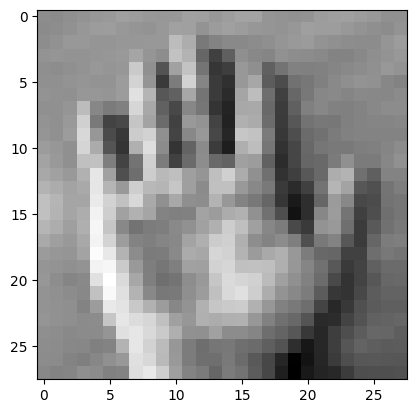

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_image(tensor):
  img=tensor.numpy()
  img=np.squeeze(img, axis = 0)
  plt.imshow(img, cmap='gray')

tensor = batch_x[3]
show_image(tensor)